# Advanced fMRI data analysis 
## fMRI data manipulation and plotting in Python

In this assignment, your task is to complete a few exercises related to data manipulation and plotting in Python.

You can choose to answer in Polish or English (it will not affect your grade).


**DEADLINE:** 10-04-2020

--------------------


**1. Find a one scientific article reporting fMRI findings (search via google Scholar, PubMed). In a paragraph describing fMRI data acquisition, find details about MRI/fMRI scanning parameters such as TR, voxel size, slice thickness, field of view, matrix size, and number of volumes. Fill the information below:**

Article (Authors, year, title, journal): Increased Global Functional Connectivity Correlates with LSD-Induced Ego Dissolution (2016)

Authors: Enzo Tagliazucchi, Leor Roseman, Mendel Kaelen, ..., Amanda Feilding, David J. Nutt, Robin Carhart-Harris

Journal: Cell Press

*Structural scan (T1):*

- voxel size = 1 x 1 x 1 [mm]
- slice thicknes = 1 mm
- FOV = 256 × 256 × 192
- matrix size =  256 × 256 × 192

*Functional scan (T2*):*
- TR = 2000 ms
- voxel size = 3.4 x 3.4 x 3.4 [mm]
- slice thicknes = 3.4 mm
- FOV =  220 mm
- matrix size =  64 × 64
- number of volumes = 35

**2. Find a portrait photo (.jpg) of your favourite TV series or movie character (head and shoulders) and complete exercises.**

- Crop a photo using online tool (https://www.iloveimg.com/crop-image) to size 400 x 400 (face has to be in the center of image)
- Manipulate the image in python (fill code below)

(400, 400)


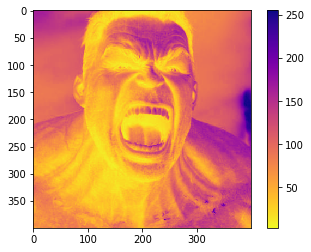

In [3]:
# Load libraries
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg 


# Load the image 
image = mpimg.imread('images\hulk-cgi.jpg')
plt.imshow(image)

# Create a new variable containing only the first (RED) channel of image (e.g. new_image = image[:,:,0])
new_image = image[:,:,0]

# Print shape and type of the image
print(new_image.shape)
type(new_image)


# Plot the new image using plt.imshow with changed cmap and colorbar
plt.imshow(new_image, cmap="plasma_r")
plt.colorbar()


# Save the new image as numpy array (use np.save())
x = np.array(new_image)
np.save('hulk-cgi.jpg', x)



Example solution: 

<img style="float: left" img src="images/screenshot_solution.png" width="300" >


**3. Load structural (T1) MRI image in python and visualize a one sagittal brain section that nicely presents the hippocampus.**

(193, 229, 193)


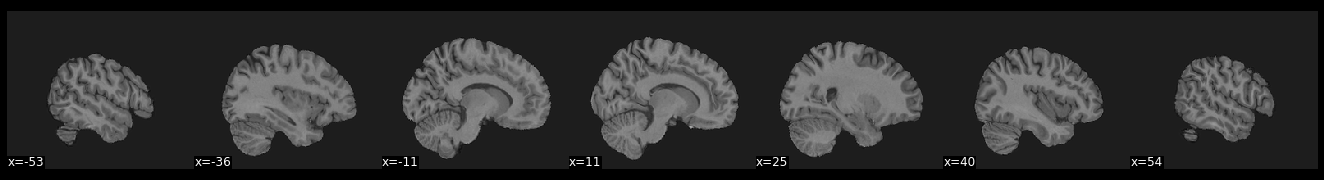

In [23]:
# Load libraries
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg 
from nilearn import plotting, image


# Load MRI image in python (.nii file in "data" folder)

mri_path = "data/sub-01_T1w_space-MNI152NLin2009cAsym_preproc.nii.gz"
fmri = image.load_img(mri_path)
# Print shape and type of the image
print(fmri.shape)
type(fmri)

# Plot sagittal section of the MRI image presenting the hippocampus

plotting.plot_anat(fmri, display_mode = 'x')



**4. Use pandas to load the most recent Covid-19 data (the cumulative number of deaths) in .csv format (https://github.com/nicebread/corona/tree/master/data/CSSE_data; e.g. CSSE_deaths_2020-03-26.csv) and visualize *timeseries* from 5 selected countries.** 


In [24]:
# Load libraries

import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg 
from nilearn import plotting, image
import pandas as pd
# Load .csv data frame in python 

covid = pd.read_csv("data\CSSE_confirmed_2020-03-26.csv")
# Print first 5 rows of data
covid[0:5]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [25]:
# Group by country & sum cases
grouped = covid.groupby("Country/Region").sum()

# Print last 5 rows of grouped data
print(grouped.tail(5))


                        Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                              
Venezuela            6.4238  -66.5897        0        0        0        0   
Vietnam             16.0000  108.0000        0        2        2        2   
West Bank and Gaza  31.9522   35.2332        0        0        0        0   
Zambia             -15.4167   28.2833        0        0        0        0   
Zimbabwe           -20.0000   30.0000        0        0        0        0   

                    1/26/20  1/27/20  1/28/20  1/29/20  ...  3/16/20  3/17/20  \
Country/Region                                          ...                     
Venezuela                 0        0        0        0  ...       17       33   
Vietnam                   2        2        2        2  ...       61       66   
West Bank and Gaza        0        0        0        0  ...       38       39   
Zambia                    0        0        0        0 

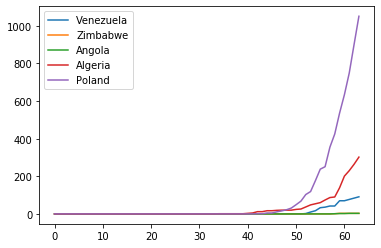

In [29]:
# Write a simple loop (or a function) that plots cumulative deaths from 5 selected countries


def plot(data, countries=[]):
    
    for country in countries:
        cases = data.loc[country].values[2:]
        
        plt.plot(cases)
        plt.legend(countries)
    
    
plot(grouped, countries=["Venezuela", "Zimbabwe", "Angola", "Algeria", "Poland"])

**5*. (optional; for magical points) Use MRI/fMRI data to create a visualization for a logo of our "Advanced fMRI analysis" course GitHub page (https://github.com/fMRIAnalysisCourse)**

In [24]:
# Optional code

